In [124]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas.io.json import json_normalize
import os
import json
import requests
import matplotlib.pyplot as plt
from sodapy import Socrata
import numpy as np
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import pysal as ps
from geopandas.tools import sjoin
#for mapping the gpx file
#!pip install gpxpy  
import zipfile
import gpxpy
from pandas import DataFrame

from numpy import inf

import pyKriging  
from pyKriging.krige import kriging  
from pyKriging.samplingplan import samplingplan

from pylab import *
import numpy as np
from pandas import DataFrame, Series
from scipy.spatial.distance import pdist, squareform

%matplotlib inline

In [2]:
#unpack dataframe in PUIDATA
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [3]:
#Import CT Data
with zipfile.ZipFile("%s/Freegan/ct_all.zip"%os.getenv("PUIDATA"),"r") as zip_ref:
    zip_ref.extractall("ct_alldir")
    
#Move into PUIDATA
os.rename("/nfshome/sjs909/GIS/Freegan Project/ct_alldir", "/nfshome/sjs909/PUIDATA/Freegan/ct_alldir")


In [4]:
# Import CT Stores
with zipfile.ZipFile("%s/Freegan/ct_stores.zip"%os.getenv("PUIDATA"),"r") as zip_ref:
    zip_ref.extractall("ct_storesdir")
    
#Move into PUIDATA
os.rename("/nfshome/sjs909/GIS/Freegan Project/ct_storesdir", "/nfshome/sjs909/PUIDATA/Freegan/ct_storesdir")


In [5]:
ct_all = 'Freegan/ct_alldir/ct_all/ct_all.shp'
ct_all = GeoDataFrame.from_file('{}/{}'.format(os.getenv('PUIDATA'), ct_all))
ct_all.crs = from_epsg(4326)

In [6]:
ct_all.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,store_coun,total_atte,geometry
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,3.0,0.0,POLYGON ((-73.97823073299477 40.72067428669261...
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,6358.386684,4.0,0.0,POLYGON ((-73.97990650235904 40.72686577300233...
2,1006800,1,Manhattan,I,6800,68,MN21,Gramercy,3808,1.877943e+06,5723.883037,6.0,0.0,"POLYGON ((-73.98085965412409 40.7419697680819,..."
3,1008900,1,Manhattan,I,8900,89,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.782279e+06,5578.769499,5.0,0.0,POLYGON ((-73.99897237419262 40.74463005524836...
4,1009600,1,Manhattan,E,9600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,5737.356247,0.0,0.0,"POLYGON ((-73.9776548272757 40.75791142377995,..."


In [8]:
ct_stores = 'Freegan/ct_storesdir/ct_stores/ct_stores.shp'
ct_stores = GeoDataFrame.from_file('{}/{}'.format(os.getenv('PUIDATA'), ct_stores))
ct_stores.crs = from_epsg(4326)

In [9]:
ct_stores.head()

,county,dba_name,entity_nam,license_nu,store.lon,store.lat,geometry
0,New York,VERMILYES EXPRESS DELI,VERMILYES EXPRESS DELI CORP,629459,-73.920715,40.866729,POINT (-73.920715 40.866729)
1,New York,CRS REALTY GROUP,CRS REALTY GROUP INC,727131,-74.003748,40.748270,POINT (-74.003748 40.74827)
2,New York,GARIK NEWS,GARIK NEWS INC,730661,-74.011234,40.702024,POINT (-74.011234 40.702024)
3,New York,WHITE GOLD BUTCHERS,375 AMSTERDAM AVENUE RESTAURANT L,724879,-73.978897,40.782358,POINT (-73.978897 40.782358)
4,New York,7 ELEVEN STORE #35522C,ISHANI CONVENIENCE INC,733456,-73.970637,40.788591,POINT (-73.970637 40.788591)


In [12]:
%mkdir ARC

# Visualize Store Density and Freegan Meetup RSVP

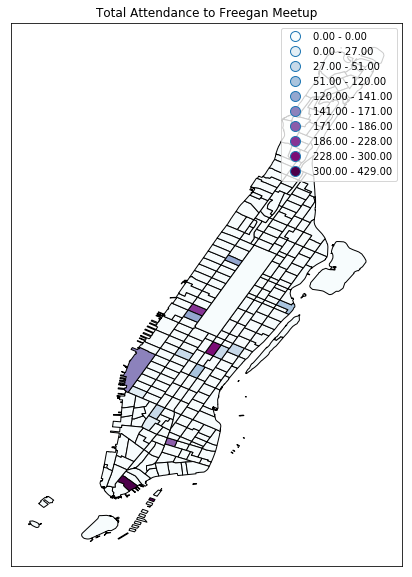

In [27]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ct_all.plot(column='total_atte', edgecolor='black',ax=ax, figsize=(10,10),legend=True,cmap = 'BuPu', k=10, scheme='fisher_jenks')
plt.title('Total Attendance to Freegan Meetup')
plt.savefig("ARC/FreeganRSVPCT", bbox_inches='tight')

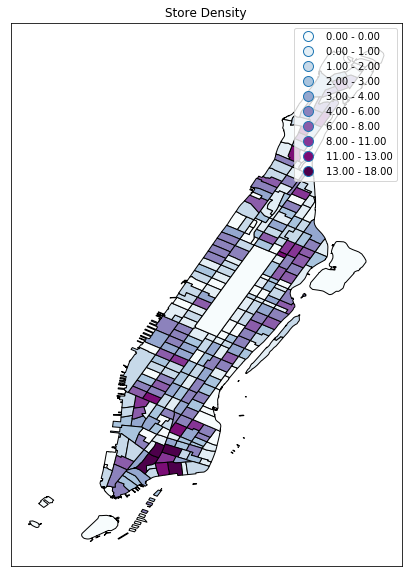

In [28]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ct_all.plot(column='store_coun', edgecolor='black',ax=ax, figsize=(10,10),legend=True,cmap = 'BuPu', k=10, scheme='fisher_jenks')
plt.title('Store Density')
plt.savefig("ARC/StoreDensityCT", bbox_inches='tight')

In [ ]:
## Add Our Freegan Trash Tour

In [29]:
# Let's add our Freegan Trash Tour Path
gpx = gpxpy.parse(open('RK_gpx _2018-11-15_2159.gpx'))

print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]

print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]

print("{} point(s)".format(len(segment.points)))

1 track(s)
1 segment(s)
195 point(s)


In [30]:
data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])
    


columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
trashTour = DataFrame(data, columns=columns)
trashTour.head()

,Longitude,Latitude,Altitude,Time,Speed
0,-73.998040,40.730285,8.5,2018-11-16 02:59:05,0.844117
1,-73.998079,40.730207,8.5,2018-11-16 02:59:16,0.699479
2,-73.997976,40.730145,8.6,2018-11-16 02:59:36,0.746797
3,-73.997876,40.730108,8.6,2018-11-16 02:59:46,1.137685
4,-73.997774,40.730075,8.7,2018-11-16 02:59:53,1.022868


In [31]:
trashTour = GeoDataFrame(trashTour)

In [32]:
trashTour['lonlat']=list(zip(trashTour.Longitude,trashTour.Latitude))

In [33]:
# Create Point Geometry for based on lonlat column
trashTour['geometry']=trashTour[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
trashTour.head()

,Longitude,Latitude,Altitude,Time,Speed,lonlat,geometry
0,-73.998040,40.730285,8.5,2018-11-16 02:59:05,0.844117,"(-73.99804, 40.730285)",POINT (-73.99804 40.730285)
1,-73.998079,40.730207,8.5,2018-11-16 02:59:16,0.699479,"(-73.998079, 40.730207)",POINT (-73.998079 40.730207)
2,-73.997976,40.730145,8.6,2018-11-16 02:59:36,0.746797,"(-73.997976, 40.730145)",POINT (-73.99797599999999 40.730145)
3,-73.997876,40.730108,8.6,2018-11-16 02:59:46,1.137685,"(-73.997876, 40.730108)",POINT (-73.99787600000001 40.730108)
4,-73.997774,40.730075,8.7,2018-11-16 02:59:53,1.022868,"(-73.997774, 40.730075)",POINT (-73.99777400000001 40.730075)


In [34]:
trashTour.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

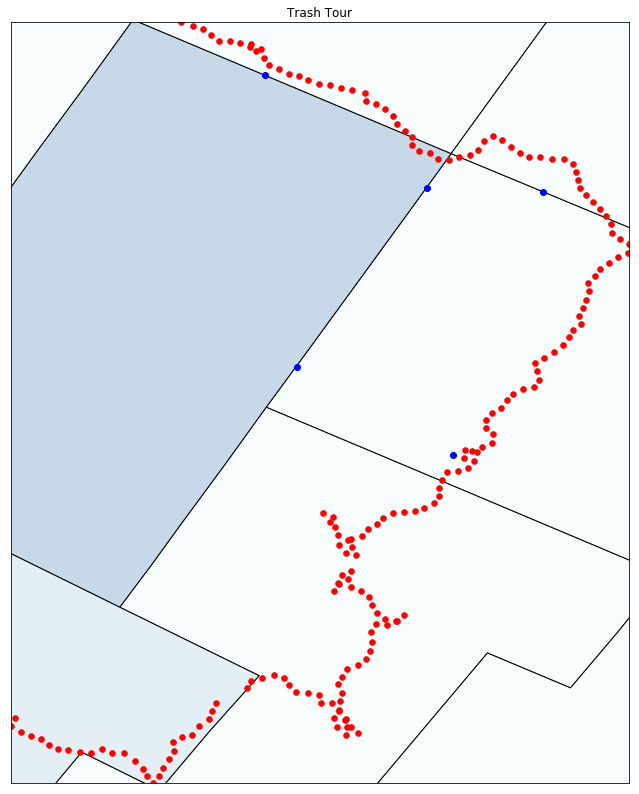

In [44]:
#Zoom into where our trash tour met
fig, ax = plt.subplots(figsize = (14, 14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ct_all.plot(column='total_atte', edgecolor='black',ax=ax, figsize=(10,10),legend=False,cmap = 'BuPu', k=10, scheme='fisher_jenks')
ct_stores.plot(ax = ax, marker = 'o', c = 'blue')
trashTour.plot(ax=ax,
        c ='red', lw=.5, alpha=1, label='Trash Tour Path')

minx, miny, maxx, maxy = trashTour.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
plt.title('Trash Tour')
plt.savefig("ARC/TrashTour", bbox_inches='tight')

# Autocorrelation

In [48]:
ct_all.head(100)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,store_coun,total_atte,geometry,rsvpStoreP
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,3.0,0.0,POLYGON ((-73.97823073299477 40.72067428669261...,0.0
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,6358.386684,4.0,0.0,POLYGON ((-73.97990650235904 40.72686577300233...,0.0
2,1006800,1,Manhattan,I,6800,68,MN21,Gramercy,3808,1.877943e+06,5723.883037,6.0,0.0,"POLYGON ((-73.98085965412409 40.7419697680819,...",0.0
3,1008900,1,Manhattan,I,8900,89,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.782279e+06,5578.769499,5.0,0.0,POLYGON ((-73.99897237419262 40.74463005524836...,0.0
4,1009600,1,Manhattan,E,9600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,5737.356247,0.0,0.0,"POLYGON ((-73.9776548272757 40.75791142377995,...",NaN
5,1009800,1,Manhattan,I,9800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,8.0,0.0,POLYGON ((-73.96432543478758 40.75638153099089...,0.0
6,1010000,1,Manhattan,I,10000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168488,1.0,51.0,POLYGON ((-73.96802436915853 40.75957814005281...,51.0
7,1010200,1,Manhattan,I,10200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802579,4.0,300.0,POLYGON ((-73.97124277307127 40.76093641847906...,75.0
8,1010400,1,Manhattan,I,10400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036118,2.0,0.0,POLYGON ((-73.97445730616322 40.76229308352502...,0.0
9,1011201,1,Manhattan,I,11201,112.01,MN17,Midtown-Midtown South,3807,8.561644e+05,3716.146785,1.0,0.0,POLYGON ((-73.97301487242221 40.76427887944536...,0.0


In [ ]:
# Make a proportion for attendance per store count

In [46]:
ct_all['rsvpStoreP'] = ct_all['total_atte']/ct_all['store_coun']

In [52]:
ct_all[ct_all.rsvpStoreP.isna()]

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,store_coun,total_atte,geometry,rsvpStoreP
4,1009600,1,Manhattan,E,9600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,5737.356247,0.0,0.0,"POLYGON ((-73.9776548272757 40.75791142377995,...",NaN
20,1014802,1,Manhattan,I,14802,148.02,MN40,Upper East Side-Carnegie Hill,3805,1.351365e+06,4691.029341,0.0,0.0,POLYGON ((-73.95165920749085 40.78200767416536...,NaN
24,1015602,1,Manhattan,E,15602,156.02,MN33,East Harlem South,3804,1.169935e+06,4524.706934,0.0,0.0,POLYGON ((-73.94331889400084 40.78517329787518...,NaN
28,1020101,1,Manhattan,I,20101,201.01,MN09,Morningside Heights,3802,5.935267e+05,3329.881695,0.0,0.0,"POLYGON ((-73.9584066268315 40.80741921086745,...",NaN
41,1026700,1,Manhattan,E,26700,267,MN35,Washington Heights North,3801,5.187717e+05,3869.447379,0.0,0.0,POLYGON ((-73.93062107886071 40.84848097676885...,NaN
45,1019702,1,Manhattan,E,19702,197.02,MN11,Central Harlem South,3803,5.095623e+05,3204.620753,0.0,0.0,"POLYGON ((-73.95632115140226 40.8031153447365,...",NaN
47,1020500,1,Manhattan,I,20500,205,MN09,Morningside Heights,3802,2.977091e+06,7148.866896,0.0,0.0,"POLYGON ((-73.96111106787343 40.8118302983349,...",NaN
53,1016900,1,Manhattan,I,16900,169,MN12,Upper West Side,3806,1.937088e+06,5751.661335,0.0,0.0,POLYGON ((-73.96933573318947 40.78529327955703...,NaN
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,5280.102498,0.0,0.0,POLYGON ((-73.99145971106623 40.73173815939454...,NaN
77,1023000,1,Manhattan,E,23000,230,MN03,Central Harlem North-Polo Grounds,3803,1.869851e+06,5672.967819,0.0,0.0,POLYGON ((-73.93764373459294 40.81851059183499...,NaN


In [53]:
#Change NaN to 0
ct_all.fillna(0, inplace=True)

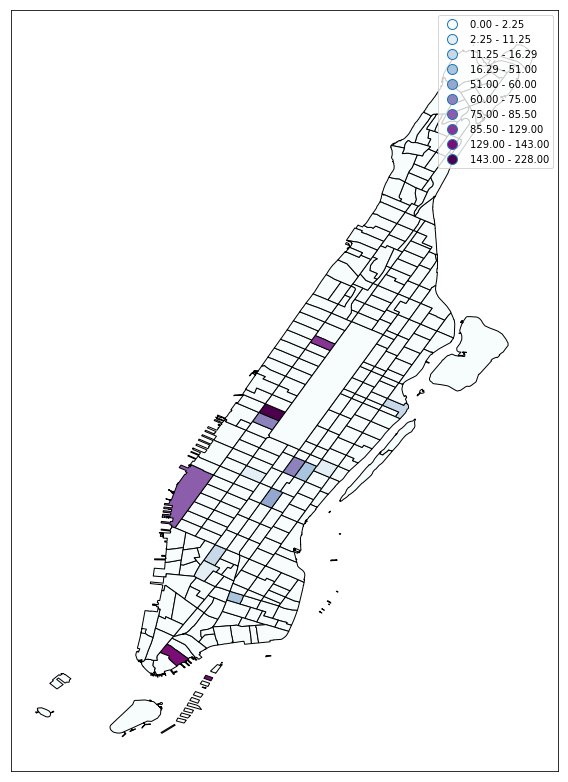

In [56]:
# Look at the proportion of RSVP per Store Density
fig, ax = plt.subplots(figsize = (14, 14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_all.plot(column='rsvpStoreP', edgecolor='black',ax=ax, figsize=(10,10),legend=True,cmap = 'BuPu', k=10, scheme='fisher_jenks')


In [57]:
path='Output/ct_all.shp'
ct_all.to_file(path)

To calculate Moran’s I we first need to read in a GAL file for a rook weights matrix and create an instance of W:

In [58]:
qW_CT=ps.queen_from_shapefile(path)

In [59]:
qW_CT[10]

{6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 114: 1.0, 238: 1.0}

In [60]:
qW_CT.cardinalities[10]

8

In [61]:
qW_CT.islands

[117, 248, 264]

The weight matrix for rook contiguity can be calculated for a grid by iterating over the matrix elements and checking if the flattened dimensions differ by either one or the width of the matrix:

In [62]:
# Matrix of weights
Wmatrix, ids = qW_CT.full()

In [63]:
Wmatrix

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

row-standardized "r"

In [64]:
qW_CT.transform = 'r'

('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 248, ' is an island (no neighbors)')
('WARNING: ', 264, ' is an island (no neighbors)')


Calculate row sums and normalize the weight matrix:

In [65]:
qW_CT.full()[0]

array([[0.        , 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
        0.        ]])

In [69]:
ct_all.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,store_coun,total_atte,geometry,rsvpStoreP
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,3.0,0.0,POLYGON ((-73.97823073299477 40.72067428669261...,0.0
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,6358.386684,4.0,0.0,POLYGON ((-73.97990650235904 40.72686577300233...,0.0
2,1006800,1,Manhattan,I,6800,68,MN21,Gramercy,3808,1.877943e+06,5723.883037,6.0,0.0,"POLYGON ((-73.98085965412409 40.7419697680819,...",0.0
3,1008900,1,Manhattan,I,8900,89,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.782279e+06,5578.769499,5.0,0.0,POLYGON ((-73.99897237419262 40.74463005524836...,0.0
4,1009600,1,Manhattan,E,9600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,5737.356247,0.0,0.0,"POLYGON ((-73.9776548272757 40.75791142377995,...",0.0


In [67]:
rsvpStoreP = ct_all.rsvpStoreP
rsvpStorePLag=ps.lag_spatial(qW_CT, rsvpStoreP)

In [70]:
rsvpStorePLagQ10 = ps.Quantiles(rsvpStorePLag, k=10)
rsvpStorePLagQ10

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  0.000               211
 0.000 < x[i] <=  2.121                19
 2.121 < x[i] <= 11.072                29
11.072 < x[i] <= 59.700                29

We decompose the data into four quadrants. The upper-right quadrant and the lower-left quadrant correspond with positive spatial autocorrelation (similar values at neighboring locations). We refer to them as respectively high-high and low-low spatial autocorrelation. In contrast, the lower-right and upper-left quadrant correspond to negative spatial autocorrelation (dissimilar values at neighboring locations). We refer to them as respectively high-low and low-high spatial autocorrelation.

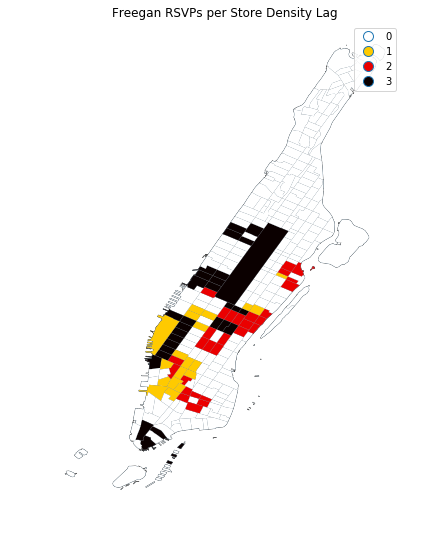

In [81]:
f, ax = plt.subplots(figsize=(9, 9))
ct_all.plot(alpha=5,lw=.5,ax=ax,edgecolor='black')
ct_all.assign(cl=rsvpStorePLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Freegan RSVPs per Store Density Lag");
fig.savefig("ARC/Autocorrelation", bbox_inches='tight')

We can see this is the slope of the best fit line through the graph of lag versus data:

In [82]:
b,a = np.polyfit(rsvpStoreP, rsvpStorePLag, 1)
b,a

(0.035581875290070744, 3.101841028464297)

These are the coefficients for the proportion and the lag in the Moran's I

Below we have the plot to see this slope.

The slope of this line corresponds to Moran’s I, and its value (0.035) 



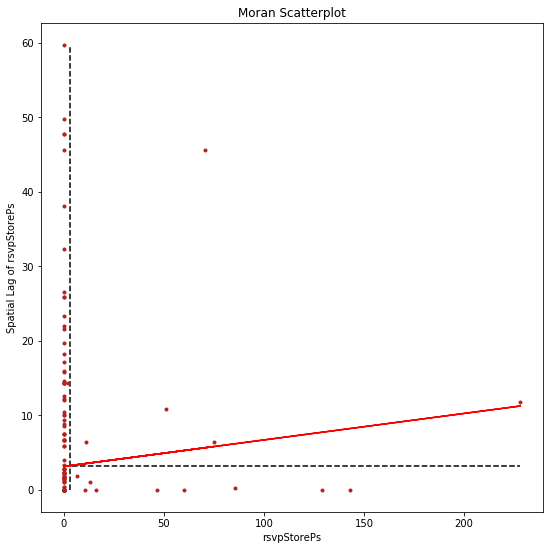

In [83]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(rsvpStoreP, rsvpStorePLag, '.', color='firebrick')

 # dashed vert at mean of the Freegan Meetups per store
plt.vlines(rsvpStoreP.mean(), rsvpStorePLag.min(), rsvpStorePLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged Freegan Meetups per store
plt.hlines(rsvpStorePLag.mean(), rsvpStoreP.min(), rsvpStoreP.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(rsvpStoreP, a + b * rsvpStoreP, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of rsvpStorePs')
plt.xlabel('rsvpStorePs');
f.savefig("ARC/MoranScatterplot", bbox_inches='tight')

In [ ]:
Weakly positive

The dashed lines represent the means.

We see a few outliers to the right where there are more fRSVPs per store density count, where it is very far above the mean for freegan rsvps.

To the left we see a large concentration of 0 Freegan Meetup RSVPs per store count.

# Using Function

In [89]:
y = rsvpStoreP
w = qW_CT

mi = ps.Moran(y, w, two_tailed=False)

"%.3f"%mi.I

'0.036'

This is the autocorrelation, it's good that we are getting the same value as when we do it by hand.

In [ ]:
# What is the expected value under normality assumption

In [85]:
mi.EI

-0.003484320557491289

In [ ]:
# What is the p value

In [86]:
"%.5f"%mi.p_norm

'0.13085'

From these results, we see that the observed value for I is above its expected value, under the assumption of normality for the number of Freegan Meetup RSVP per store rate. However this value could just be due to random noise as the p-value is not past .05.


In [ ]:
help(mi)

Use random permutations of the values on the spatial units to generate a reference distribution for I under the null:

In [87]:
mir = ps.Moran(y, w, permutations = 9999)

In [90]:
print mir.p_sim

0.0973


pysal.readthedocs.io/en/latest/users/tutorials/autocorrelation.html#local-moran-s-i

# Local Moran's I

In [ ]:
ps.Moran_Local?

y              : array
                 (n,1), attribute array
w              : W
                 weight instance assumed to be aligned with y

In [91]:
y = rsvpStoreP
w = qW_CT

In [92]:
np.random.seed(42)
lm = ps.Moran_Local(y, w)

In [93]:
lm.n

288

In [94]:
len(lm.Is)

288

We see 288 LISAs are stored in the vector lm.Is. Inference about these values is obtained through conditional randomization which leads to pseudo p-values for each LISA:

In [95]:
lm.p_sim

array([0.296, 0.398, 0.311, 0.064, 0.035, 0.106, 0.112, 0.182, 0.115,
       0.078, 0.106, 0.068, 0.256, 0.266, 0.285, 0.343, 0.272, 0.268,
       0.236, 0.354, 0.377, 0.096, 0.171, 0.269, 0.33 , 0.254, 0.329,
       0.265, 0.177, 0.274, 0.296, 0.329, 0.268, 0.203, 0.195, 0.289,
       0.21 , 0.288, 0.422, 0.252, 0.264, 0.153, 0.296, 0.234, 0.298,
       0.271, 0.328, 0.152, 0.27 , 0.297, 0.302, 0.293, 0.319, 0.279,
       0.29 , 0.231, 0.202, 0.297, 0.331, 0.296, 0.265, 0.33 , 0.267,
       0.207, 0.299, 0.215, 0.31 , 0.191, 0.179, 0.181, 0.161, 0.341,
       0.345, 0.324, 0.346, 0.203, 0.273, 0.243, 0.009, 0.373, 0.33 ,
       0.207, 0.142, 0.286, 0.307, 0.292, 0.266, 0.375, 0.178, 0.181,
       0.327, 0.319, 0.313, 0.28 , 0.341, 0.289, 0.325, 0.283, 0.246,
       0.299, 0.204, 0.269, 0.314, 0.162, 0.349, 0.302, 0.299, 0.293,
       0.344, 0.272, 0.048, 0.314, 0.03 , 0.033, 0.324, 0.286, 0.242,
       0.001, 0.275, 0.274, 0.332, 0.012, 0.297, 0.279, 0.047, 0.001,
       0.269, 0.309,

In [96]:
#identify the significant LISA values, we use numpy indexing
sig = lm.p_sim<0.05
lm.p_sim[sig]

array([0.035, 0.009, 0.048, 0.03 , 0.033, 0.001, 0.012, 0.047, 0.001,
       0.023, 0.036, 0.04 , 0.001, 0.042, 0.043, 0.047, 0.005, 0.002,
       0.001, 0.019, 0.008, 0.001, 0.047, 0.001, 0.012, 0.001, 0.049])

In [ ]:
# find out which quadrant of the Moran scatter plot each of the significant values is contained in

In [103]:
sorted(lm.q[sig])

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4]

So we have a few siginificant values mostly cointained in the 2nd quadrant of low high autocorrelation.

In [ ]:
# Let's look at only where the trash tour went

# Semivariogram

In [105]:
ct_stores.head()

,county,dba_name,entity_nam,license_nu,store.lon,store.lat,geometry
0,New York,VERMILYES EXPRESS DELI,VERMILYES EXPRESS DELI CORP,629459,-73.920715,40.866729,POINT (-73.920715 40.866729)
1,New York,CRS REALTY GROUP,CRS REALTY GROUP INC,727131,-74.003748,40.748270,POINT (-74.003748 40.74827)
2,New York,GARIK NEWS,GARIK NEWS INC,730661,-74.011234,40.702024,POINT (-74.011234 40.702024)
3,New York,WHITE GOLD BUTCHERS,375 AMSTERDAM AVENUE RESTAURANT L,724879,-73.978897,40.782358,POINT (-73.978897 40.782358)
4,New York,7 ELEVEN STORE #35522C,ISHANI CONVENIENCE INC,733456,-73.970637,40.788591,POINT (-73.970637 40.788591)


In [104]:
ct_all.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,store_coun,total_atte,geometry,rsvpStoreP
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,3817.391631,3.0,0.0,POLYGON ((-73.97823073299477 40.72067428669261...,0.0
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,6358.386684,4.0,0.0,POLYGON ((-73.97990650235904 40.72686577300233...,0.0
2,1006800,1,Manhattan,I,6800,68,MN21,Gramercy,3808,1.877943e+06,5723.883037,6.0,0.0,"POLYGON ((-73.98085965412409 40.7419697680819,...",0.0
3,1008900,1,Manhattan,I,8900,89,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.782279e+06,5578.769499,5.0,0.0,POLYGON ((-73.99897237419262 40.74463005524836...,0.0
4,1009600,1,Manhattan,E,9600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,5737.356247,0.0,0.0,"POLYGON ((-73.9776548272757 40.75791142377995,...",0.0


In [ ]:
# Lets do a spatial join for store points in ct_all

In [106]:
ct_all.crs = from_epsg(4326)
ct_all.crs

{'init': 'epsg:4326', 'no_defs': True}

In [107]:
ct_stores.crs = from_epsg(4326)
ct_stores.crs

{'init': 'epsg:4326', 'no_defs': True}

In [108]:
ct_all_ft = ct_all.to_crs(epsg=2263)
ct_stores_ft = ct_stores.to_crs(epsg=2263)

In [109]:
stores_all_shape = sjoin(ct_all_ft,ct_stores_ft)

In [113]:
stores_all_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,total_atte,geometry,rsvpStoreP,index_right,county,dba_name,entity_nam,license_nu,store.lon,store.lat
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,...,0.0,"POLYGON ((990284.3284301723 201838.3563842234,...",0.0,807,New York,GROCERY SQUARE,GROCERY SQUARE INC,731323,-73.978420,40.720410
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,...,0.0,"POLYGON ((990284.3284301723 201838.3563842234,...",0.0,412,New York,FIRST&FIRST FINEST DELI,FIRST & FIRST FINEST DELI CORP,628596,-73.980845,40.721349
0,1002202,1,Manhattan,I,2202,22.02,MN28,Lower East Side,3809,6.039223e+05,...,0.0,"POLYGON ((990284.3284301723 201838.3563842234,...",0.0,767,New York,26 TOBACCO SHOP,26 TOBACCO SHOP CORP,717787,-73.980783,40.721414
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,...,0.0,"POLYGON ((989819.2963867191 204093.9949950601,...",0.0,649,New York,HIGH VIBE,HIGH VIBE HEALTH AND HEALING INC,729395,-73.985455,40.723725
1,1003200,1,Manhattan,I,3200,32,MN22,East Village,3809,2.334190e+06,...,0.0,"POLYGON ((989819.2963867191 204093.9949950601,...",0.0,323,New York,KEY FOOD 566,MANDELL FOOD STORES INC,626480,-73.984963,40.724093


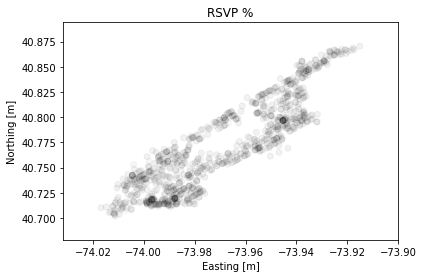

In [120]:

plt.scatter( stores_all_shape['store.lon'], stores_all_shape['store.lat'], c=stores_all_shape.rsvpStoreP, cmap='gray',alpha=.05 )

plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('RSVP %') ;
plt.savefig("ARC/RSVPlatlon", bbox_inches='tight')

# The Semivariogram

The semivariogram allows us to model the similarity points in a field as a function of distance. We want to look at the spatial variance.

Below is a function to calculate the semivariogram. To find the sum of squared differences between values separated by a distance 

In [125]:
def SVh( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    '''
    pd = squareform( pdist( P[:,:2] ) )
    N = pd.shape[0]
    Z = list()
    for i in range(N):
        for j in range(i+1,N):
            if( pd[i,j] >= h-bw )and( pd[i,j] <= h+bw ):
                Z.append( ( P[i,2] - P[j,2] )**2.0 )
    return np.sum( Z ) / ( 2.0 * len( Z ) )
 
def SV( P, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( P, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T
 
def C( P, h, bw ):
    '''
    Calculate the sill
    '''
    c0 = np.var( P[:,2] )
    if h == 0:
        return c0
    return c0 - SVh( P, h, bw )


In [ ]:
# Make subset of data where we take when there is rsvp

In [131]:
rsvpSpots = stores_all_shape[stores_all_shape['rsvpStoreP'] > 0]

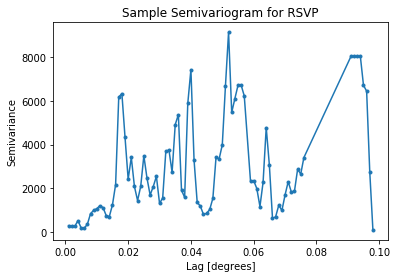

In [145]:
# part of our data set recording porosity
P = np.array( rsvpSpots[['store.lon','store.lat','rsvpStoreP']] )
# bandwidth, plus or minus .001 degree
bw = .001
# lags in .001 degree increments from zero to 100
hs = np.arange(0,10,bw)
sv = SV( P, hs, bw )
plot( sv[0], sv[1], '.-' )
xlabel('Lag [degrees]')
ylabel('Semivariance')
title('Sample Semivariogram for RSVP') ;
savefig('ARC/sample_semivariogramRSVP.png',fmt='png',dpi=200)


From this we see that there is a good bit of variance in RSVP counts depending on distance between points.

## Let's look at total attendance

In [138]:
rsvpSpots.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,total_atte,geometry,rsvpStoreP,index_right,county,dba_name,entity_nam,license_nu,store.lon,store.lat
6,1010000,1,Manhattan,I,10000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,...,51.0,"POLYGON ((993108.3057861312 216013.1307982803,...",51.0,526,New York,CVS PHARMACY 03752,CVS ALBANY LLC,625163,-73.970548,40.758988
7,1010200,1,Manhattan,I,10200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,300.0,"POLYGON ((992216.5391845678 216507.6870116643,...",75.0,282,New York,CVS PHARMACY #2962,CVS ALBANY LLC,629236,-73.974335,40.756870
7,1010200,1,Manhattan,I,10200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,300.0,"POLYGON ((992216.5391845678 216507.6870116643,...",75.0,464,New York,TEUSCHER CHOCOLATES,TEUSCHER PROMENADE LLC,625570,-73.977493,40.758119
7,1010200,1,Manhattan,I,10200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,300.0,"POLYGON ((992216.5391845678 216507.6870116643,...",75.0,216,New York,DUANE READE 14127,DUANE READE ET AL PTRS,623808,-73.974193,40.758895
7,1010200,1,Manhattan,I,10200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,300.0,"POLYGON ((992216.5391845678 216507.6870116643,...",75.0,486,New York,ROYCE ON MADISON,ROYCE ON MADISON LLC,704799,-73.974338,40.759525


In [131]:
rsvpSpots = stores_all_shape[stores_all_shape['rsvpStoreP'] > 0]

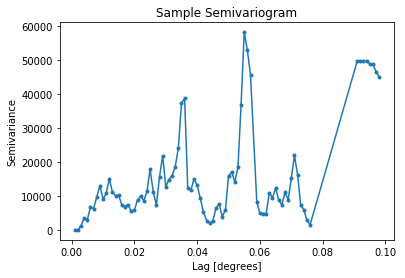

In [140]:
# part of our data set recording porosity
P = np.array( rsvpSpots[['store.lon','store.lat','total_atte']] )
# bandwidth, plus or minus .001 degree
bw = .001
# lags in .001 degree increments from zero to 10
hs = np.arange(0,10,bw)
sv = SV( P, hs, bw )
plot( sv[0], sv[1], '.-' )
xlabel('Lag [degrees]')
ylabel('Semivariance')
title('Sample Semivariogram') ;
savefig('ARC/sample_semivariogramTotattendance.png',fmt='png',dpi=200)


This is interesting to see there is some consistency in total attendance when the spatial lag is closer.

In [174]:
rsvpSpots.columns

Index([ u'BoroCT2010',    u'BoroCode',    u'BoroName',  u'CDEligibil',
            u'CT2010',     u'CTLabel',     u'NTACode',     u'NTAName',
              u'PUMA',  u'Shape_Area',  u'Shape_Leng',  u'store_coun',
        u'total_atte',    u'geometry',  u'rsvpStoreP', u'index_right',
            u'county',    u'dba_name',  u'entity_nam',  u'license_nu',
         u'store.lon',   u'store.lat'],
      dtype='object')

# Modeling

Now that we’ve calculated the semivariogram, we will need to fit a model to the data. Now I will implement the spherical model, the most common type. First, we will present a function named opt() for determining the optimal value a for the spherical model.

In [146]:
def opt( fct, x, y, C0, parameterRange=None, meshSize=1000 ):
    if parameterRange == None:
        parameterRange = [ x[1], x[-1] ]
    mse = np.zeros( meshSize )
    a = np.linspace( parameterRange[0], parameterRange[1], meshSize )
    for i in range( meshSize ):
        mse[i] = np.mean( ( y - fct( x, a[i], C0 ) )**2.0 )
    return a[ mse.argmin() ]


The opt() function finds the optimal parameter for fitting a spherical model to the semivariogram data. The spherical model is given by the function spherical(). 

In [147]:
def spherical( h, a, C0 ):
    '''
    Spherical model of the semivariogram
    '''
    # if h is a single digit
    if type(h) == np.float64:
        # calculate the spherical function
        if h <= a:
            return C0*( 1.5*h/a - 0.5*(h/a)**3.0 )
        else:
            return C0
    # if h is an iterable
    else:
        # calcualte the spherical function for all elements
        a = np.ones( h.size ) * a
        C0 = np.ones( h.size ) * C0
        return map( spherical, h, a, C0 )


Next, cvmodel() fits a model to the semivariogram data and returns a covariance method named covfct()

In [148]:
def cvmodel( P, model, hs, bw ):
    '''
    Input:  (P)      ndarray, data
            (model)  modeling function
                      - spherical
                      - exponential
                      - gaussian
            (hs)     distances
            (bw)     bandwidth
    Output: (covfct) function modeling the covariance
    '''
    # calculate the semivariogram
    sv = SV( P, hs, bw )
    # calculate the sill
    C0 = C( P, hs[0], bw )
    # calculate the optimal parameters
    param = opt( model, sv[0], sv[1], C0 )
    # return a covariance function
    covfct = lambda h, a=param: C0 - model( h, a, C0 )
    return covfct

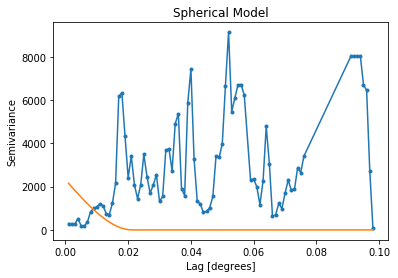

In [150]:
sp = cvmodel( P, model=spherical, hs=np.arange(0,10,.001), bw=.001 )
plot( sv[0], sv[1], '.-' )
plot( sv[0], sp( sv[0] ) ) ;
title('Spherical Model')
ylabel('Semivariance')
xlabel('Lag [degrees]')
savefig('ARC/semivariogram_model.png',fmt='png',dpi=200)


# Gravity distribution model 

In [ ]:
# Let's use our trash tour for flows and time cost

In [189]:
trashTour.head()

,Longitude,Latitude,Altitude,Time,Speed,lonlat,geometry
0,-73.998040,40.730285,8.5,2018-11-16 02:59:05,0.844117,"(-73.99804, 40.730285)",POINT (-73.99804 40.730285)
1,-73.998079,40.730207,8.5,2018-11-16 02:59:16,0.699479,"(-73.998079, 40.730207)",POINT (-73.998079 40.730207)
2,-73.997976,40.730145,8.6,2018-11-16 02:59:36,0.746797,"(-73.997976, 40.730145)",POINT (-73.99797599999999 40.730145)
3,-73.997876,40.730108,8.6,2018-11-16 02:59:46,1.137685,"(-73.997876, 40.730108)",POINT (-73.99787600000001 40.730108)
4,-73.997774,40.730075,8.7,2018-11-16 02:59:53,1.022868,"(-73.997774, 40.730075)",POINT (-73.99777400000001 40.730075)


In [ ]:
## Spatial Join with stores_all

In [199]:
trashTour.crs = from_epsg(4326)
trashTour.crs

{'init': 'epsg:4326', 'no_defs': True}

In [200]:
ct_all.crs = from_epsg(4326)
ct_all.crs

{'init': 'epsg:4326', 'no_defs': True}

In [201]:
ct_all_ft = ct_all.to_crs(epsg=2263)
trashTour_ft = trashTour.to_crs(epsg=2263)

In [202]:
trash_joined = sjoin(ct_all_ft,trashTour_ft)

In [206]:
trash_joined.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,total_atte,geometry,rsvpStoreP,index_right,Longitude,Latitude,Altitude,Time,Speed,lonlat
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,0.0,"POLYGON ((986616.931030275 205868.6337890164, ...",0.0,69,-73.994627,40.731611,9.5,2018-11-16 03:47:12,1.295792,"(-73.994627, 40.731611)"
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,0.0,"POLYGON ((986616.931030275 205868.6337890164, ...",0.0,71,-73.994756,40.731645,9.3,2018-11-16 03:47:30,0.826883,"(-73.994756, 40.731645)"
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,0.0,"POLYGON ((986616.931030275 205868.6337890164, ...",0.0,73,-73.994768,40.731652,9.2,2018-11-16 03:48:04,0.416902,"(-73.994768, 40.731652)"
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,0.0,"POLYGON ((986616.931030275 205868.6337890164, ...",0.0,70,-73.994657,40.731693,9.4,2018-11-16 03:47:18,1.202534,"(-73.994657, 40.731693)"
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,0.0,"POLYGON ((986616.931030275 205868.6337890164, ...",0.0,74,-73.994720,40.731731,9.2,2018-11-16 03:48:27,0.518387,"(-73.99472, 40.731731)"


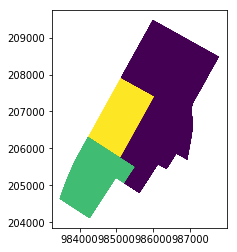

In [207]:
trash_joined.plot('total_atte')

In [208]:
trash_joined.columns

Index([ u'BoroCT2010',    u'BoroCode',    u'BoroName',  u'CDEligibil',
            u'CT2010',     u'CTLabel',     u'NTACode',     u'NTAName',
              u'PUMA',  u'Shape_Area',  u'Shape_Leng',  u'store_coun',
        u'total_atte',    u'geometry',  u'rsvpStoreP', u'index_right',
         u'Longitude',    u'Latitude',    u'Altitude',        u'Time',
             u'Speed',      u'lonlat'],
      dtype='object')

In [182]:
from pysal.contrib.spint.gravity import  BaseGravity, Gravity, Production, Attraction, Doubly
from pysal.contrib.spint.dispersion import phi_disp
from pysal.contrib.spint.vec_SA import VecMoran

In [ ]:
# for cost let's look at time! 

In [ ]:
# make a point duration in seconds column

In [214]:
import datetime

In [343]:
trash_joined.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,index_right,Longitude,Latitude,Altitude,Time,Speed,lonlat,hour,minute,seconds
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,69,-73.994627,40.731611,9.5,2018-11-16 03:47:12,1.295792,"(-73.994627, 40.731611)",3,47,12
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,71,-73.994756,40.731645,9.3,2018-11-16 03:47:30,0.826883,"(-73.994756, 40.731645)",3,47,30
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,73,-73.994768,40.731652,9.2,2018-11-16 03:48:04,0.416902,"(-73.994768, 40.731652)",3,48,4
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,70,-73.994657,40.731693,9.4,2018-11-16 03:47:18,1.202534,"(-73.994657, 40.731693)",3,47,18
70,1005900,1,Manhattan,I,5900,59,MN23,West Village,3810,1.250316e+06,...,74,-73.994720,40.731731,9.2,2018-11-16 03:48:27,0.518387,"(-73.99472, 40.731731)",3,48,27


In [335]:
time.reset_index(level=0, inplace=True)

In [340]:
trash_joined['hour'] = trash_joined['Time'].dt.hour.values

In [341]:
trash_joined['minute']= trash_joined['Time'].dt.minute.values

In [342]:
trash_joined['seconds']= trash_joined['Time'].dt.second.values

In [209]:
#Flows between store counts
flows = trash_joined['store_coun'].values.reshape((-1,1))

In [345]:
#Trip "cost" in time (seconds)
cost = trash_joined['seconds'].values.reshape((-1,1))

In [ ]:


"""#Origin variables: square footage of buildings, housing units, total station capacity
o_vars = np.hstack([bikes['o_sq_foot'].values.reshape((-1,1)),
                    bikes['o_housing'].values.reshape((-1,1)),
                    bikes['o_cap'].values.reshape((-1,1))])
"""
'''#Destination variables: square footage of buildings, housing units, total station capacity
d_vars = np.hstack([bikes['d_sq_foot'].values.reshape((-1,1)),
                    bikes['d_housing'].values.reshape((-1,1)),
                    bikes['d_cap'].values.reshape((-1,1))])
'''
#Trip "cost" in time (seconds)
cost = trash_joined['seconds'].values.reshape((-1,1))

#Origin ids
#o = bikes['o_tract'].astype(str).values.reshape((-1,1))

#destination ids
#d = bikes['d_tract'].astype(str).values.reshape((-1,1))

#print len(bikes), ' OD pairs between census tracts after filtering out intrazonal flows'

In [349]:
#First we fit a basic gravity model and examine the parameters and model fit

grav= Gravity(flows, cost, o_vars=None, d_vars=None)

print grav.params

print 'Adjusted psuedo R2: ', grav.adj_pseudoR2
print 'Adjusted D2: ', grav.adj_D2
print 'SRMSE: ', grav.SRMSE
print 'Sorensen similarity index: ', grav.SSI

TypeError: __init__() got multiple values for keyword argument 'o_vars'